# **Recognizing Handwritten Digits Using Scikit-learn**
## This is project 2 of the "Data Analysis using Python" internship at Suven Consultants 

#Nikhil R


https://internship.suvenconsultants.com/domains/Data-Analytics-Python/ 

##Project Guide:
https://internship.suvenconsultants.com/documents/Project%202%20DA%20using%20Scikit_learn%20Coding%20Internship%20docs.pdf

## Hypothesis to be tested : 
###The Digits data set of scikit-learn library provides numerous data-sets that are useful for testing many problems of data analysis and prediction of the results. Some Scientist claims that it predicts the digit accurately 95% of the times. Perform data Analysis to accept or reject this Hypothesis.

###We will use SVC of scikit-learn


#Project 2

##Introduction:


### Handwriting Recognition :
Recognizing handwritten text is a problem that can be traced back to the first automatic
machines that needed to recognize individual characters in handwritten documents.
Think about, for example, the ZIP codes on letters at the post office and the automation
needed to recognize these five digits. Perfect recognition of these codes is necessary in
order to sort mail automatically and efficiently.
Included among the other applications that may come to mind is OCR (Optical
Character Recognition) software. OCR software must read handwritten text, or pages of
printed books, for general electronic documents in which each character is well
defined.
But the problem of handwriting recognition goes farther back in time, more
precisely to the early 20th Century (1920s), when Emanuel Goldberg (1881–1970) began
his studies regarding this issue and suggested that a statistical approach would be an
optimal choice.
To address this issue in Python, the scikit-learn library provides a good example
to better understand this technique, the issues involved, and the possibility of making
predictions

### Scikit-learn
Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. It features various classification ,regression and clustering algorithms including support vector machine ,random forest, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. Here we are going to analyze the digits data-set of the Sci-Kit learn library. 
We are going to train a Support Vector Machine(SVM) and then we will be predicting the values of a Unknown Handwritten digits.

## Importing the modules 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Loading the digits data set of sklearn 

In [2]:
from sklearn import datasets
digits_data = datasets.load_digits()
'''
There are total 1797 images are there in the dataset.
Our whole data-set is stored in digits. 
Following is an example of a digit in our dataset. 
It consists of 64 pixels (8X8).The data set contains images of hand-written digits: 10 classes where each class refers to a digit from 0 to 9.
Each image stored as 8x8 matrices.
This dataset consists of 1,797 images that are 8x8 pixels in size. 
Each image is a handwritten digit in grayscale
'''

'\nThere are total 1797 images are there in the dataset.\nOur whole data-set is stored in digits. \nFollowing is an example of a digit in our dataset. \nIt consists of 64 pixels (8X8).The data set contains images of hand-written digits: 10 classes where each class refers to a digit from 0 to 9.\nEach image stored as 8x8 matrices.\nThis dataset consists of 1,797 images that are 8x8 pixels in size. \nEach image is a handwritten digit in grayscale\n'

### Digit 0 matrix representation

In [3]:
digits_data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Visualizing the images and labels in our Dataset


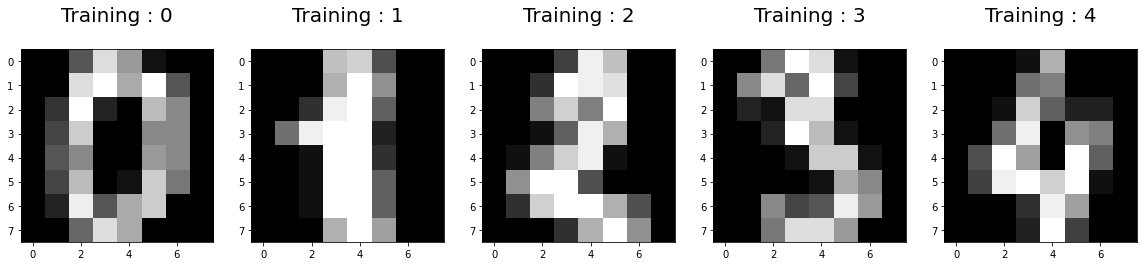

In [4]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits_data.data[:5],digits_data.target[:5])):
  plt.subplot(1,5,index+1)
  plt.imshow( np.reshape(image,(8,8)),cmap=plt.cm.gray)
  plt.title('Training : %i\n' % label,fontsize = 20)

## Modelling the Classifier

### Training And Testing
Let us train our SVM with the first 1790 images in out data-set. After that we will use the remaining Data-set as our test data and check the accuracy of our training machine.

In [5]:
from sklearn import svm
svc_model= svm.SVC(gamma=0.001,C=100.)
svc_model.fit(digits_data.data[1:1791],digits_data.target[1:1791])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##Predicting some digit and comparing it with the actual value

In [6]:
svc_model.predict(digits_data.data[1701:1710])


array([6, 5, 0, 9, 8, 9, 8, 4, 1])

In [7]:
digits_data.target[1701:1710]

array([6, 5, 0, 9, 8, 9, 8, 4, 1])

Both predicted and target values are same.
As we can see we have achieved 100% accuracy. 

##Predicting values for rest of the data
###Let us now define a function that will find the accuracy of our SVM and train our model with varying data-set. We will start with 3 elements in our training data and work our way up to 1790 data and store the accuracy of our models in a dictionary.

### Defining a function
A function to find accuracy of our SVM

In [8]:
def acc(a,b):
  hit=miss=0.0
  for i in range(len(b)):
    if a[i]==b[i]:
      hit+=1
    else:
      miss+=1
  accur= (hit/(hit+miss))*100
  return accur

In [11]:
values=dict()
#starting value should be 3 and above 
for x in range(3,1791):
  svc_model.fit(digits_data.data[1:x],digits_data.target[1:x])
  values[x] = acc( svc_model.predict(digits_data.data[1791:]),digits_data.target[1791:] )
  #since in problem statement -> 1790 for training and last few digits for testing purpose


In [12]:
for i in values:
  print(i,values[i])

3 0.0
4 0.0
5 16.666666666666664
6 16.666666666666664
7 16.666666666666664
8 16.666666666666664
9 33.33333333333333
10 50.0
11 66.66666666666666
12 66.66666666666666
13 66.66666666666666
14 66.66666666666666
15 66.66666666666666
16 50.0
17 50.0
18 50.0
19 66.66666666666666
20 83.33333333333334
21 83.33333333333334
22 83.33333333333334
23 83.33333333333334
24 83.33333333333334
25 83.33333333333334
26 83.33333333333334
27 83.33333333333334
28 83.33333333333334
29 83.33333333333334
30 83.33333333333334
31 83.33333333333334
32 83.33333333333334
33 83.33333333333334
34 83.33333333333334
35 83.33333333333334
36 83.33333333333334
37 83.33333333333334
38 83.33333333333334
39 83.33333333333334
40 100.0
41 100.0
42 100.0
43 100.0
44 100.0
45 100.0
46 100.0
47 100.0
48 100.0
49 100.0
50 100.0
51 100.0
52 100.0
53 100.0
54 100.0
55 100.0
56 100.0
57 100.0
58 100.0
59 100.0
60 100.0
61 100.0
62 100.0
63 100.0
64 100.0
65 100.0
66 100.0
67 100.0
68 100.0
69 100.0
70 100.0
71 100.0
72 100.0
73 100.0


As we can see for values till 39, we get less accuracy but whereas from 40 till 1797 we get 100% accuracy

## Plotting the "values" dictionary 

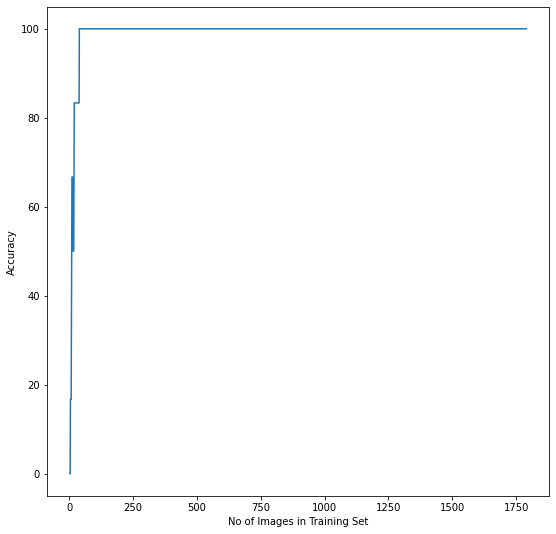

In [22]:
lists=sorted(values.items())
x,y=zip(*lists)

plt.figure(figsize=(9,9))
plt.xlabel('No of Images in Training Set')
plt.ylabel('Accuracy')
plt.plot(x,y)
plt.show()

#Conclusion


As we can clearly see for well above 95% of our models the achieved accuracy is 100% . Hence we can easily conclude that our model works for more than 95% of the time.
